In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "/home/bree/Desktop/Machine Learning/Breast Cancer Wisconsin Dataset/data.csv"
breast_cancer_data = pd.read_csv(file_path)

breast_cancer_data.head()



id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Checking for null values

In [54]:
breast_cancer_data.isnull().sum()
breast_cancer_data.isnull()


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False      False        False         False           False      False   
4    False      False        False         False           False      False   
..     ...        ...          ...           ...             ...        ...   
564  False      False        False         False           False      False   
565  False      False        False         False           False      False   
566  False      False        False         False           False      False   
567  False      False        False         False           False      False   
568  False      False        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              False             False           False                False   
1              False             False           False                False   
2              False             False           False                False   
3              False             False           False                False   
4              False             False           False                False   
..               ...               ...             ...                  ...   
564            False             False           False                False   
565            False             False           False                False   
566            False             False           False                False   
567            False             False           False                False   
568            False             False           False                False   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          False            False       False             False   
1    ...          False            False       False             False   
2    ...          False            False       False             False   
3    ...          False            False       False             False   
4    ...          False            False       False             False   
..   ...            ...              ...         ...               ...   
564  ...          False            False       False             False   
565  ...          False            False       False             False   
566  ...          False            False       False             False   
567  ...          False            False       False             False   
568  ...          False            False       False             False   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0                False            False                 False           False   
1                False            False                 False           False   
2                False            False                 False           False   
3                False            False                 False           False   
4                False            False                 False           False   
..                 ...              ...                   ...             ...   
564              False            False                 False           False   
565              False            False                 False           False   
566              False            False                 False           False   
567              False            False                 False           False   
568              False            False                 False           False   

     fractal_dimension_worst  Unnamed: 32  
0                      False         True  
1                      False         True  
2                      False         True  
3                      False         True  
4                      False

In [55]:
print(breast_cancer_data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


<Axes: >

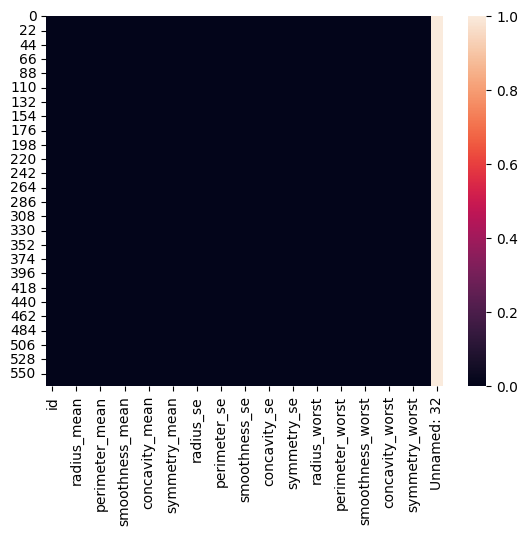

In [56]:
sns.heatmap(breast_cancer_data.isnull())

# Our target is Diagnosis.Lets convert M and B to 0 and 1

In [24]:
pd.get_dummies(breast_cancer_data['diagnosis'],drop_first = True)

M
0     True
1     True
2     True
3     True
4     True
..     ...
564   True
565   True
566   True
567   True
568  False

[569 rows x 1 columns]

In [57]:
breast_cancer_data['diagnosis'] = breast_cancer_data['diagnosis'].map({'B': 0, 'M': 1})  # Benign: 0, Malignant: 1

In [58]:
breast_cancer_data.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

# Drop irrelevant columns

In [59]:
breast_cancer_data.drop(columns=['id','Unnamed: 32'], inplace=True)

In [60]:
breast_cancer_data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

# Split the data for Training and for Testing

In [61]:
X = breast_cancer_data.drop(columns=['diagnosis'])  # Features
y = breast_cancer_data['diagnosis']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("okay")

okay


# Training our Logistic Regression Model

In [64]:
lr_model = LogisticRegression(solver='liblinear',max_iter=1000)
lr_model.fit(X_train, y_train)
print("okay")

okay


In [66]:
breast_cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Evaluate the Model

In [70]:
y_pred = lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 95.32163742690058
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix:
 [[106   2]
 [  6  57]]
